# SI figure 4

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use('default')

import dill as pickle
pickle.settings['recurse'] = True

# Import functions
%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [3]:
def data_dict_from_pkl(DataName):
    FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [4]:
repump_data = data_dict_from_pkl('SI_fig4_data.pkl')

# Generate the plot from the data

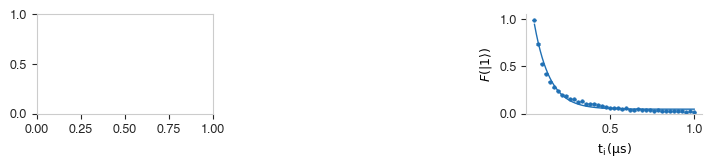

In [5]:
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54/2*fig_multiplier])#,constrained_layout=True)

gs = GridSpec(1, 3, figure=fig)#, hspace = 2)#, hspace = 1, wspace = 0.1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,2])

color_list = cm.Blues(np.linspace(0.75,1,1)) # ['k','r','b']

t = repump_data['t']
F = repump_data['F']
Ferr = repump_data['Ferr']
t_fit = repump_data['x_fit']
F_fit = repump_data['y_fit']

ax1.errorbar(t, F, Ferr, color = color_list[0], linestyle = 'none', marker = 'o', \
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
ax1.plot(t_fit, F_fit, color = color_list[0], linewidth = linewidth_default*fig_multiplier)

ax1.set_xlabel(r'$\mathrm{t_{i} \, (\mu s)}$')
ax1.set_ylabel(r'$F(|1\rangle)$')
ax1.set_ylim([0,1.05])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig4.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)